In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('FakeNewsNet.csv')

In [3]:
data.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


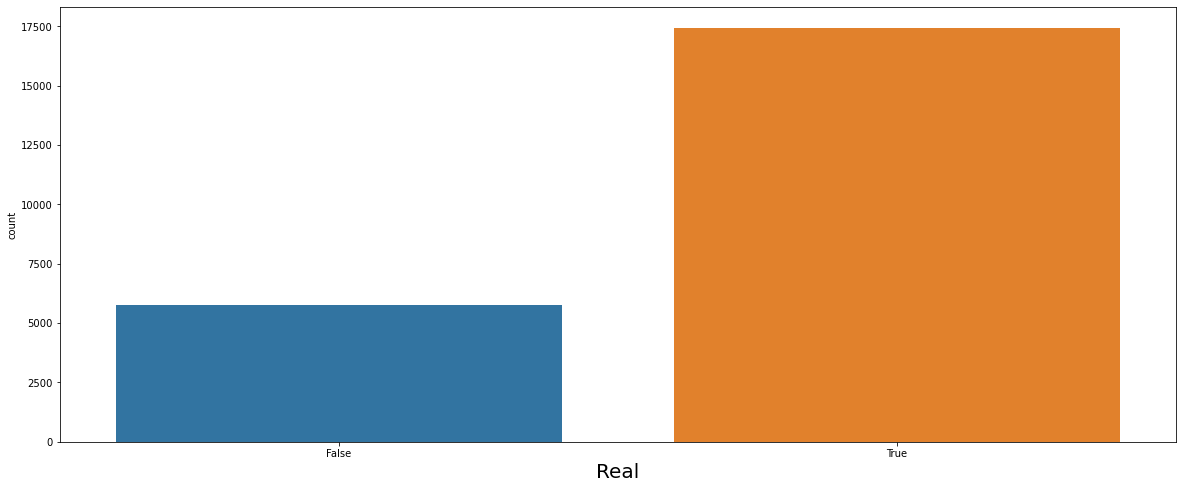

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(data=data, x='real', ax=ax)
plt.xticks([0,1], ['False', 'True'])
plt.xlabel('Real', fontsize=20)
plt.show()

In [5]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['title'])
y = data['real']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model_lr = LogisticRegression()

model_rf = RandomForestClassifier()

In [8]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(15, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

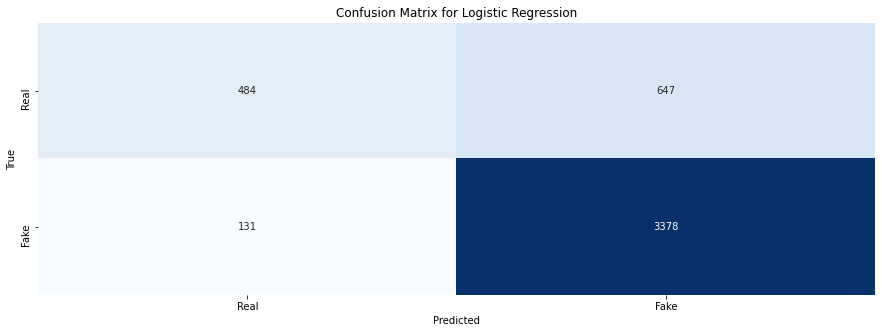

Logistic Regression Accuracy: 0.8323275862068965
              precision    recall  f1-score   support

           0       0.79      0.43      0.55      1131
           1       0.84      0.96      0.90      3509

    accuracy                           0.83      4640
   macro avg       0.81      0.70      0.73      4640
weighted avg       0.83      0.83      0.81      4640



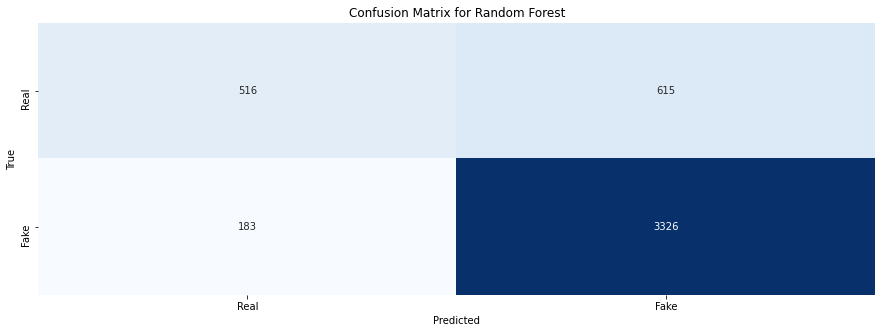

Random Forest Accuracy: 0.8280172413793103
              precision    recall  f1-score   support

           0       0.74      0.46      0.56      1131
           1       0.84      0.95      0.89      3509

    accuracy                           0.83      4640
   macro avg       0.79      0.70      0.73      4640
weighted avg       0.82      0.83      0.81      4640



In [9]:
# Training and Evaluation: Logistic Regression and Random Forest
for model, model_name in zip([model_lr, model_rf], ['Logistic Regression', 'Random Forest']):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, model_name)
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [10]:
# Histogram of words in "title" more likely to be fake news
fake_titles = data[data['real'] == 0]['title']
count_vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = count_vectorizer.fit_transform(fake_titles)
word_counts_array = word_counts.toarray().sum(axis=0)
words = count_vectorizer.get_feature_names_out()

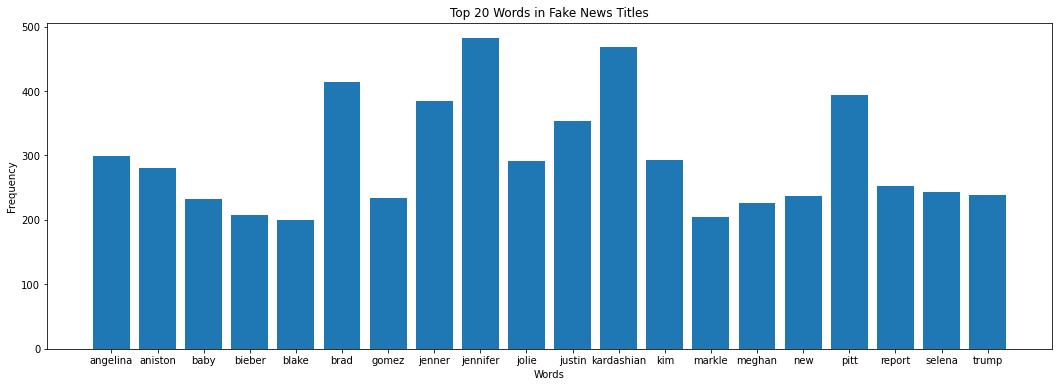

In [11]:
plt.figure(figsize=(18, 6))
plt.bar(words, word_counts_array)
plt.title("Top 20 Words in Fake News Titles")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

[Epoch 1, Batch 100] Loss: 0.488
[Epoch 1, Batch 200] Loss: 0.445
[Epoch 1, Batch 300] Loss: 0.403
[Epoch 1, Batch 400] Loss: 0.382
[Epoch 1, Batch 500] Loss: 0.394
[Epoch 1, Batch 600] Loss: 0.390
[Epoch 1, Batch 700] Loss: 0.381
[Epoch 2, Batch 100] Loss: 0.245
[Epoch 2, Batch 200] Loss: 0.234
[Epoch 2, Batch 300] Loss: 0.246
[Epoch 2, Batch 400] Loss: 0.259
[Epoch 2, Batch 500] Loss: 0.256
[Epoch 2, Batch 600] Loss: 0.251
[Epoch 2, Batch 700] Loss: 0.263
[Epoch 3, Batch 100] Loss: 0.151
[Epoch 3, Batch 200] Loss: 0.146
[Epoch 3, Batch 300] Loss: 0.162
[Epoch 3, Batch 400] Loss: 0.160
[Epoch 3, Batch 500] Loss: 0.163
[Epoch 3, Batch 600] Loss: 0.178
[Epoch 3, Batch 700] Loss: 0.176
[Epoch 4, Batch 100] Loss: 0.100
[Epoch 4, Batch 200] Loss: 0.095
[Epoch 4, Batch 300] Loss: 0.094
[Epoch 4, Batch 400] Loss: 0.106
[Epoch 4, Batch 500] Loss: 0.104
[Epoch 4, Batch 600] Loss: 0.114
[Epoch 4, Batch 700] Loss: 0.103
[Epoch 5, Batch 100] Loss: 0.054
[Epoch 5, Batch 200] Loss: 0.062
[Epoch 5, 

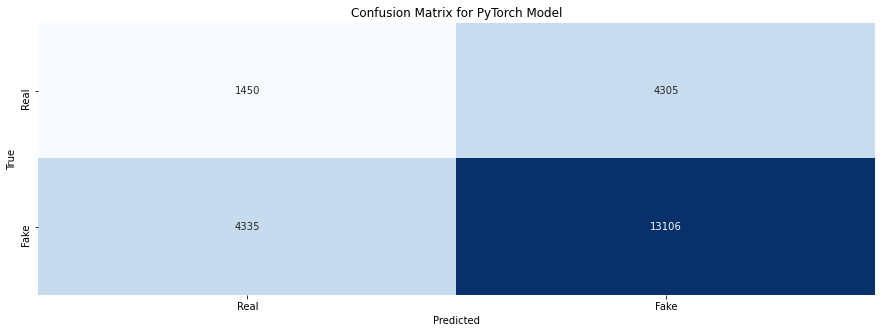

PyTorch Model Accuracy: 0.627521986549405
              precision    recall  f1-score   support

           0       0.25      0.25      0.25      5755
           1       0.75      0.75      0.75     17441

    accuracy                           0.63     23196
   macro avg       0.50      0.50      0.50     23196
weighted avg       0.63      0.63      0.63     23196



In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

data = pd.read_csv('FakeNewsNet.csv')
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['title'])
y = data['real']

X_tensor = torch.Tensor(X.toarray())
y_tensor = torch.LongTensor(y.values)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {running_loss/100:.3f}")
            running_loss = 0.0

model.eval()
with torch.no_grad():
    y_pred = []
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())

    cm = confusion_matrix(y, y_pred)
    plot_confusion_matrix(cm, "PyTorch Model")
    print(f"PyTorch Model Accuracy:", accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))


[Epoch 1, Batch 100] Loss: 0.016
[Epoch 1, Batch 200] Loss: 0.021
[Epoch 1, Batch 300] Loss: 0.017
[Epoch 1, Batch 400] Loss: 0.029
[Epoch 1, Batch 500] Loss: 0.024
[Epoch 1, Batch 600] Loss: 0.029
[Epoch 1, Batch 700] Loss: 0.027
[Epoch 2, Batch 100] Loss: 0.018
[Epoch 2, Batch 200] Loss: 0.017
[Epoch 2, Batch 300] Loss: 0.015
[Epoch 2, Batch 400] Loss: 0.025
[Epoch 2, Batch 500] Loss: 0.029
[Epoch 2, Batch 600] Loss: 0.020
[Epoch 2, Batch 700] Loss: 0.023
[Epoch 3, Batch 100] Loss: 0.019
[Epoch 3, Batch 200] Loss: 0.015
[Epoch 3, Batch 300] Loss: 0.018
[Epoch 3, Batch 400] Loss: 0.022
[Epoch 3, Batch 500] Loss: 0.025
[Epoch 3, Batch 600] Loss: 0.017
[Epoch 3, Batch 700] Loss: 0.026
[Epoch 4, Batch 100] Loss: 0.019
[Epoch 4, Batch 200] Loss: 0.014
[Epoch 4, Batch 300] Loss: 0.020
[Epoch 4, Batch 400] Loss: 0.018
[Epoch 4, Batch 500] Loss: 0.019
[Epoch 4, Batch 600] Loss: 0.019
[Epoch 4, Batch 700] Loss: 0.021
[Epoch 5, Batch 100] Loss: 0.019
[Epoch 5, Batch 200] Loss: 0.012
[Epoch 5, 

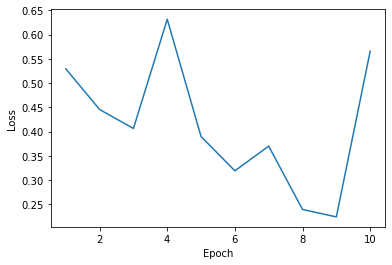

In [13]:
import matplotlib.pyplot as plt

losses = []
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {running_loss/100:.3f}")
            running_loss = 0.0
    losses.append(running_loss)

# Plot the loss over epochs
plt.plot(range(1, 11), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()